# Import Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preperation

In [3]:
digits = load_digits()

In [4]:
data = pd.DataFrame(digits.data)
data['target'] = digits.target

In [5]:
print("Digits Dataset Sample")
print(data.head())

Digits Dataset Sample
     0    1    2     3     4     5    6    7    8    9  ...   55   56   57  \
0  0.0  0.0  5.0  13.0   9.0   1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1  0.0  0.0  0.0  12.0  13.0   5.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2  0.0  0.0  0.0   4.0  15.0  12.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3  0.0  0.0  7.0  15.0  13.0   1.0  0.0  0.0  0.0  8.0  ...  0.0  0.0  0.0   
4  0.0  0.0  0.0   1.0  11.0   0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

    58    59    60    61   62   63  target  
0  6.0  13.0  10.0   0.0  0.0  0.0       0  
1  0.0  11.0  16.0  10.0  0.0  0.0       1  
2  0.0   3.0  11.0  16.0  9.0  0.0       2  
3  7.0  13.0  13.0   9.0  0.0  0.0       3  
4  0.0   2.0  16.0   4.0  0.0  0.0       4  

[5 rows x 65 columns]


In [7]:
print("\nShape of the dataset: ", digits.data.shape)
print("Unique classes (digits)",np.unique(digits.target))


Shape of the dataset:  (1797, 64)
Unique classes (digits) [0 1 2 3 4 5 6 7 8 9]


## Visualizing Some Digits

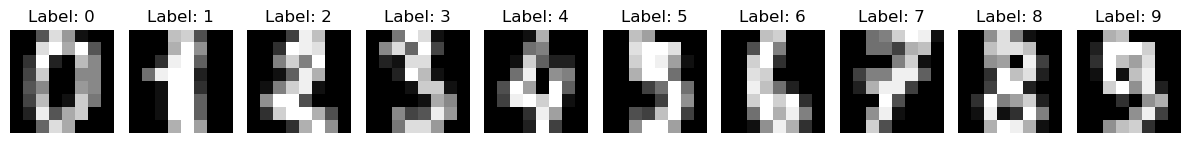

In [9]:
fig, axes = plt.subplots(1,10, figsize=(12,4))

for i, ax in enumerate(axes):
    ax.imshow(digits.images[i], cmap='gray')
    ax.set_title(f"Label: {digits.target[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()

## Standardizing the Data

In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(digits.data)

print("\nShape of the scale data:", X_scaled.shape)


Shape of the scale data: (1797, 64)


# PCA Implementation

In [12]:
pca = PCA(n_components =2)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(X_pca, columns =['PCA1','PCA2'])
pca_df['target'] = digits.target

print("\n Explained Variance Ratios (First 2 Components):", pca.explained_variance_ratio_)


 Explained Variance Ratios (First 2 Components): [0.12033916 0.09561054]


## Visualizing PCA results

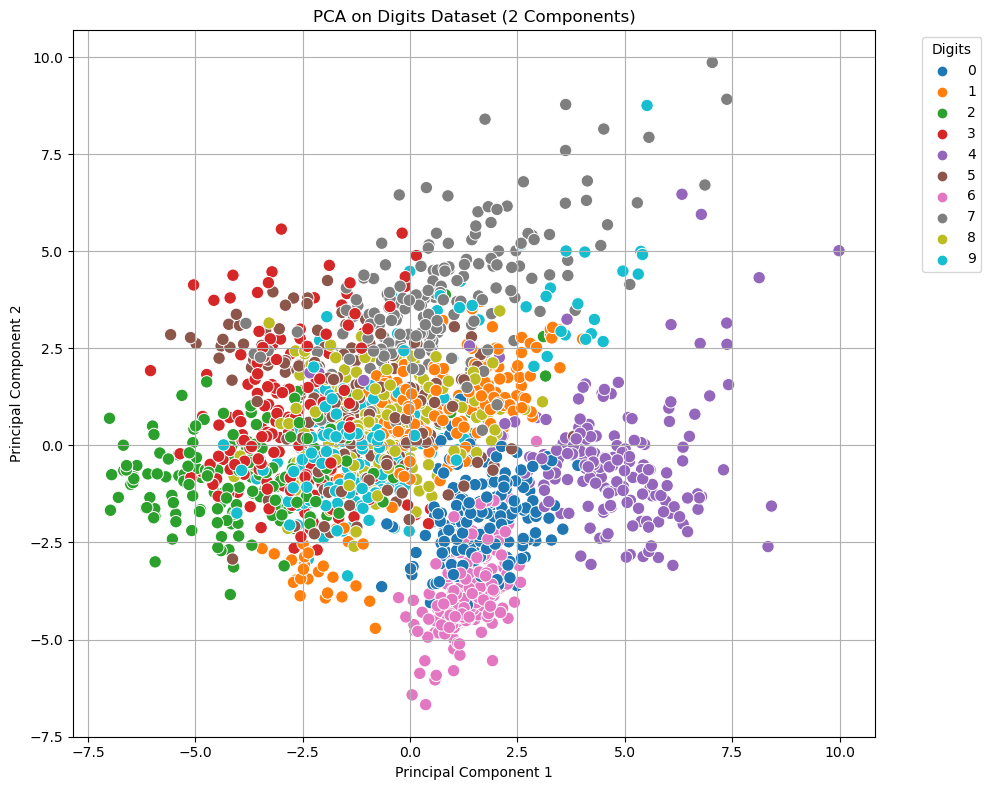

In [16]:
# Visualize the data in 2D space
plt.figure(figsize=(10, 8))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='target', palette='tab10', s=80)
plt.title('PCA on Digits Dataset (2 Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Digits', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

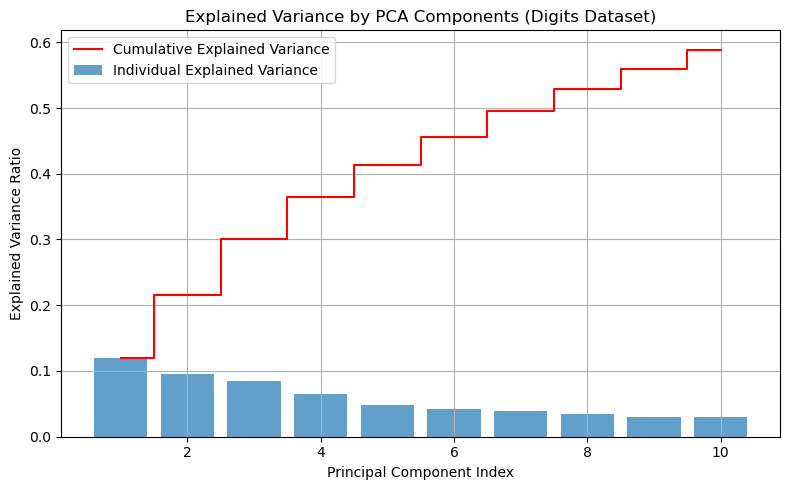

In [17]:
# Plot explained variance for the first 10 components
pca_full = PCA(n_components=10)
pca_full.fit(X_scaled)

plt.figure(figsize=(8, 5))
plt.bar(range(1, 11), pca_full.explained_variance_ratio_, alpha=0.7, align='center', label='Individual Explained Variance')
plt.step(range(1, 11), np.cumsum(pca_full.explained_variance_ratio_), where='mid', color='red', label='Cumulative Explained Variance')
plt.xlabel('Principal Component Index')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by PCA Components (Digits Dataset)')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()

# Interpreting PCA Results


Principal Component Loadings (First Two Components):
           Pixel 0   Pixel 1   Pixel 2   Pixel 3   Pixel 4   Pixel 5  \
PCA1  3.330669e-16 -0.182233 -0.285867 -0.220369  0.025169  0.009495   
PCA2 -2.775558e-16  0.047025  0.059561 -0.020807  0.155907  0.274141   

       Pixel 6   Pixel 7   Pixel 8   Pixel 9  ...  Pixel 54  Pixel 55  \
PCA1  0.052475  0.062695 -0.034707 -0.245533  ... -0.121248 -0.048771   
PCA2  0.249737  0.145832 -0.001026  0.027616  ... -0.257750 -0.115005   

      Pixel 56  Pixel 57  Pixel 58  Pixel 59  Pixel 60  Pixel 61  Pixel 62  \
PCA1  0.001834 -0.160396 -0.279852 -0.194449 -0.017774 -0.103199 -0.119811   
PCA2  0.004888  0.044497  0.081397 -0.009906 -0.251932 -0.242613 -0.165089   

      Pixel 63  
PCA1 -0.071493  
PCA2 -0.071332  

[2 rows x 64 columns]


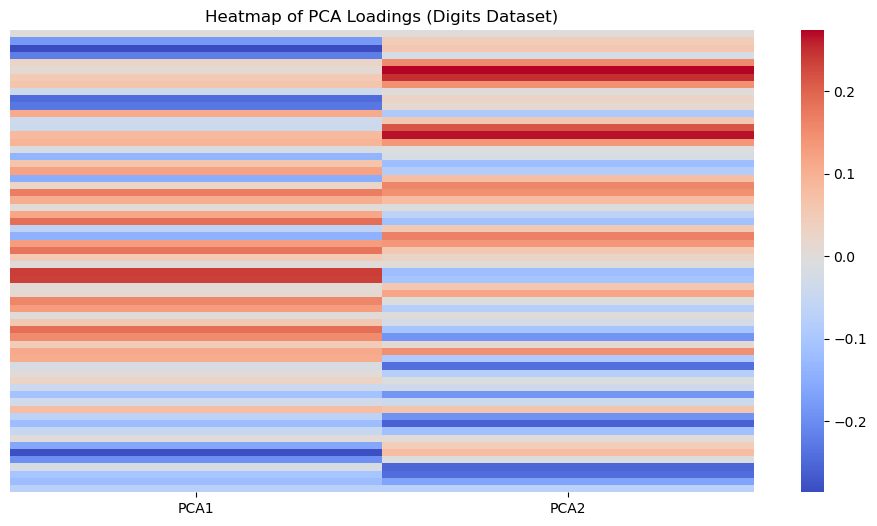

In [19]:
# Compute PCA components (loadings)
components = pd.DataFrame(pca.components_, columns=[f'Pixel {i}' for i in range(digits.data.shape[1])], index=['PCA1', 'PCA2'])
print("\nPrincipal Component Loadings (First Two Components):")
print(components)

# Visualize PCA component loadings
plt.figure(figsize=(12, 6))
sns.heatmap(components.T, annot=False, cmap='coolwarm', xticklabels=['PCA1', 'PCA2'], yticklabels=False)
plt.title('Heatmap of PCA Loadings (Digits Dataset)')
plt.show()